In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("imdb.csv",encoding='latin')

In [5]:
import sqlite3
import nltk
import string
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [6]:
data.columns

Index(['Unnamed: 0', 'type', 'review', 'label', 'file'], dtype='object')

In [7]:
data.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dikshabubna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
from nltk.stem import PorterStemmer
sno = nltk.stem.SnowballStemmer('english') 


In [10]:
import re
import string 
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [11]:
i=0
str1=' '
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in data['review'].values:
    if i%100==0:
     print (i)
    filtered_sentence=[]
    sent=cleanhtml(sent) 
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop_words):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (data['label'].values)[i] == "pos": 
                        all_positive_words.append(s) 
                    if(data['label'].values)[i] == "neg":
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [12]:
data['cleaned_review']=final_string

In [13]:
from sklearn.model_selection import train_test_split

In [57]:
def posneg(x):
    if x=="neg":
        return 0
    else :
        return 1
    
filtered_score = data['label'].map(posneg)
print(filtered_score)
data['score'] = filtered_score

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: label, Length: 100000, dtype: int64


In [65]:
test_data = data[:25000]
train_data = data[25000:50000]
X_train = train_data["cleaned_review"]
y_train = train_data["score"]

X_test = test_data["cleaned_review"]
y_test = test_data["score"]

In [66]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [68]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_train = tf_idf_vect.fit_transform(X_train)
tf_idf_test = tf_idf_vect.transform(X_test)

C:\Users\dikshabubna\Downloads\Programs\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [69]:
alpha_range = list(np.arange(1,50,5))
len(alpha_range)

10

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

In [70]:
from sklearn.naive_bayes import MultinomialNB

alpha_scores=[]

for a in alpha_range:
    clf = MultinomialNB(alpha=a)
    print(clf)
    scores = cross_val_score(clf, tf_idf_train, y_train, cv=5,scoring='accuracy')
    alpha_scores.append(scores.mean())
    print(a,scores.mean())

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)
1 0.8301999999999999
MultinomialNB(alpha=6, class_prior=None, fit_prior=True)
6 0.8355599999999999
MultinomialNB(alpha=11, class_prior=None, fit_prior=True)
11 0.8340400000000001
MultinomialNB(alpha=16, class_prior=None, fit_prior=True)
16 0.8324
MultinomialNB(alpha=21, class_prior=None, fit_prior=True)
21 0.8312799999999999
MultinomialNB(alpha=26, class_prior=None, fit_prior=True)
26 0.8299199999999999
MultinomialNB(alpha=31, class_prior=None, fit_prior=True)
31 0.8288400000000001
MultinomialNB(alpha=36, class_prior=None, fit_prior=True)
36 0.82736
MultinomialNB(alpha=41, class_prior=None, fit_prior=True)
41 0.82584
MultinomialNB(alpha=46, class_prior=None, fit_prior=True)
46 0.82452


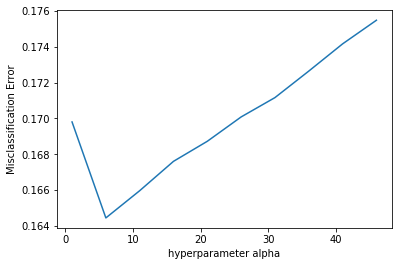

In [71]:
MSE = [1 - x for x in alpha_scores]


optimal_alpha_bnb = alpha_range[MSE.index(min(MSE))]

# plot misclassification error vs alpha
plt.plot(alpha_range, MSE)

plt.xlabel('hyperparameter alpha')
plt.ylabel('Misclassification Error')
plt.show()

In [72]:
optimal_alpha_bnb

6

In [73]:
clf = MultinomialNB(alpha=6)
clf.fit(tf_idf_train,y_train)

MultinomialNB(alpha=6, class_prior=None, fit_prior=True)

In [74]:
y_pred_test = clf.predict(tf_idf_test)

In [77]:
acc = accuracy_score(y_test, y_pred_test, normalize=True)
print('Test accuracy is',(acc))

Test accuracy is 0.85508


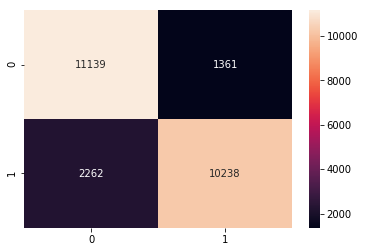

In [81]:
cm_test = confusion_matrix(y_test,y_pred_test)
import seaborn as sns
sns.heatmap(cm_test,annot=True,fmt='d')
plt.show()

In [84]:
y_pred_train = clf.predict(tf_idf_train)
acc = accuracy_score(y_train, y_pred_train, normalize=True) 
print('Train accuracy is' ,(acc))

Train accuracy is 0.93628
